In [13]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

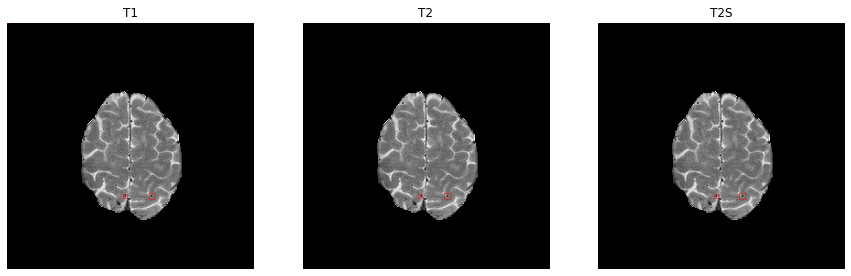

In [14]:

# Load the YOLO output
yolo_output = [
    {"image_id": "sub-110_slice_030", "category_id": 1, "bbox": [1177.542, 1422.887, 42.15, 43.279], "score": 0.00048}, {"image_id": "sub-110_slice_030", "category_id": 1, "bbox": [0.0, 0.0, 0.0, 0.0], "score": 0.00039}, {"image_id": "sub-110_slice_030", "category_id": 1, "bbox": [963.222, 1424.976, 30.836, 35.595], "score": 0.00022},
]

# Root path of the images
# root_path = '/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_t2s_GAN/images/val'
root_path = "/media/Datacenter_storage/Ji/valdo_dataset/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_t2s_GAN_3slices_cmbTrainOnly/images/val"


# Function to visualize the image with bounding boxes on separate channels
def visualize_image_with_bboxes(image_id, bboxes):
    image_path = os.path.join(root_path, f"{image_id}.png")
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Separate the channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]

    # Plot the channels with bounding boxes
    plt.figure(figsize=(15, 5))

    for i, (channel, cmap, title) in enumerate(zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues'], ['T1', 'T2', 'T2S'])):
        plt.subplot(1, 3, i + 1)
        plt.imshow(channel, cmap='gray')
        for bbox in bboxes:
            x, y, width, height = bbox
            # Increase the size of the bounding box
            rect = plt.Rectangle((x - 2, y - 2), width + 4, height + 4, edgecolor='red', facecolor='none', linewidth=0.5)
            plt.gca().add_patch(rect)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Group bounding boxes by image_id
bboxes_by_image = {}
for item in yolo_output:
    image_id = item['image_id']
    bbox = item['bbox']
    if image_id not in bboxes_by_image:
        bboxes_by_image[image_id] = []
    bboxes_by_image[image_id].append(bbox)

# Visualize each image with its bounding boxes on separate channels
for image_id, bboxes in bboxes_by_image.items():
    visualize_image_with_bboxes(image_id, bboxes)

In [15]:
def find_nonempty_text_files(directory):
    """
    Find all non-empty .txt files in a directory
    Returns a list of file names
    """
    nonempty_files = []
    dir_path = Path(directory)
    
    # Find all .txt files
    for txt_file in dir_path.glob("*.txt"):
        # Check if file is not empty
        if txt_file.stat().st_size > 0:
            with open(txt_file, 'r') as f:
                content = f.read().strip()
                if content:  # Check if there's actual content after stripping whitespace
                    nonempty_files.append(txt_file.name)
    
    return sorted(nonempty_files)  # Sort alphabetically

task = "val"
directory = '/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG/labels/val'
# directory = f"{root_path}/labels/{task}"  # Replace with your folder path
nonempty_files = find_nonempty_text_files(directory)

print(f"Found {len(nonempty_files)} non-empty text files:")
for filename in nonempty_files:
    print(f"- {filename}")

Found 0 non-empty text files:
